In [1]:
#I want to make a program that traces the development of people with corona
#for this, I want to use the statistics provided on https://www.worldometers.info
#I want to trace:
    #the time where the scrape was made
        #is it possible to only update when new information is provided?
    #the country
    #the infected-number for each country
    #the death-number for each country

In [2]:
#looking at the original data already downloaded:
import pandas as pd
newfile=pd.read_excel("coronaglobalstats.xlsx")
newfile
type(newfile) # dataframe
newfile.keys() #same as newfile.columns-command

Index(['timestamp', 'country', 'cases', 'deaths', 'recovered'], dtype='object')

In [3]:
import requests as rq
from bs4 import BeautifulSoup
url="https://www.worldometers.info/coronavirus/"

In [4]:
#because I cannot just open a link with B.S., I need to use an HTTP client
urlstring=rq.get(url).text
soup=BeautifulSoup(urlstring,"html.parser")

In [5]:
#it seems like each row in the table is a td in a tr in the first tbody:
#<tr style="" role="row" class="even">
##COUNTRY<td style="font-weight: bold; font-size:15px; text-align:left;"> Morocco </td>
##TOTALC<td style="font-weight: bold; text-align:right" class="">6</td>
#NEWC<td style="font-weight: bold; text-align:right;"> </td>
##TOTALD<td style="font-weight: bold; text-align:right;" class="sorting_1"> 1 </td>
#NEWD<td style="font-weight: bold; text-align:right;"> </td>
#RECOVERED<td style="font-weight: bold; text-align:right"> </td>
#ACTIVE<td style="text-align:right;font-weight:bold;"> 5 </td>
#SERIOUS<td style="font-weight: bold; text-align:right">1 </td>
#PER 1M POP<td style="font-weight: bold; text-align:right" class="">0.2</td> </tr>
###soup.find("tbody") #det ligger her!

In [6]:
soup.tr

<tr> <th width="100">Country,<br>Other</br></th> <th width="20">Total<br>Cases</br></th> <!--<th width="20">%&nbsp;of&nbsp;All<br />Cases</th>--> <th width="30">New<br>Cases</br></th> <th width="30">Total<br/>Deaths</th> <th width="30">New<br/>Deaths</th> <th width="30">Total<br/>Recovered</th> <!--<th width="30">New<br />Recovered</th>--> <th width="30">Active<br/>Cases</th> <th width="30">Serious,<br/>Critical</th> <!--<th width="30">Death<br />Rate</th> --> <th width="30">Tot Cases/<br/>1M pop</th> </tr>

In [7]:
soup.td.text

' China '

In [8]:
trs=soup.find_all("tr")
trs[1]


<tr style=""> <td style="font-weight: bold; font-size:15px; text-align:left;"> <a class="mt_a" href="country/china/">China</a> </td> <td style="font-weight: bold; text-align:right">80,881</td> <!--<td style="font-weight: bold; text-align:right">44.12%</td>--> <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;"> +21 </td> <td style="font-weight: bold; text-align:right;"> 3,226 </td> <td style="font-weight: bold; text-align:right;background-color:red; color:white">+13 </td> <td style="font-weight: bold; text-align:right">68,694 </td> <!-- <td style="font-weight: bold; text-align:right;background-color:green; color:white">+940 </td>--> <td style="text-align:right;font-weight:bold;"> 8,961 </td> <td style="font-weight: bold; text-align:right">3,226 </td> <!-- <td style="font-weight: bold; text-align:right;">4.5% </td>--> <td style="font-weight: bold; text-align:right">56.2</td> </tr>

In [9]:
#we need:
#country,deaths,cases,recovered,timeset

In [10]:
#først scrape eksisterende materiale
import datetime
import requests as rq
records=[]
#we skip trs[0] as it contains title and other annoying non-td-stuff

for element in trs[1:]:
    time=datetime.datetime.now()
    country=element.find("a"=="mt_a").text.strip()
    infect=element.find_all("td")[1].text
    dead=element.find_all("td")[3].text
    recovered=element.find_all("td")[5].text
    records.append((time,country,infect,dead,recovered))#infected,dead,recovered,time))

records

[(datetime.datetime(2020, 3, 17, 10, 7, 3, 953476),
  'China',
  '80,881',
  ' 3,226 ',
  '68,694 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 953766),
  'Italy',
  '27,980',
  ' 2,158 ',
  '2,749 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 953934),
  'Iran',
  '14,991',
  ' 853 ',
  '4,996 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954061),
  'Spain',
  '9,942',
  ' 342 ',
  '530 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954189),
  'S. Korea',
  '8,320',
  ' 81 ',
  '1,401 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954382),
  'Germany',
  '7,272',
  ' 17 ',
  '67 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954488),
  'France',
  '6,633',
  ' 148 ',
  '12 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954581),
  'USA',
  '4,743',
  ' 93 ',
  '74 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954671),
  'Switzerland',
  '2,354',
  ' 21 ',
  '4 '),
 (datetime.datetime(2020, 3, 17, 10, 7, 3, 954755),
  'UK',
  '1,543',
  ' 55 ',
  '52 '),
 (datetime.datetime(2020, 3, 

In [11]:
#lave det scrapede til en dataframe
import pandas as pd
df2=pd.DataFrame(records,columns=["timestamp","country","cases","deaths","recovered"])
df2["timestamp"]=pd.to_datetime(df2["timestamp"])

In [12]:
### newlist skal sammen med records via concat-metoden
dfcomb=pd.concat([newfile,df2],ignore_index=True)
#type(records) = list = bad

In [13]:
dfcomb

,timestamp,country,cases,deaths,recovered
0,2020-03-13 16:11:09.957000,China,"80,815","3,177","64,152"
1,2020-03-13 16:11:09.958000,Italy,"15,113","1,016","1,258"
2,2020-03-13 16:11:09.958000,Iran,"11,364",514,"3,529"
3,2020-03-13 16:11:09.958000,S. Korea,"7,979",71,510
4,2020-03-13 16:11:09.958000,Spain,"4,209",120,189
...,...,...,...,...,...
1190,2020-03-17 10:07:03.978637,Suriname,1,,
1191,2020-03-17 10:07:03.978717,Eswatini,1,,
1192,2020-03-17 10:07:03.978799,Tanzania,1,,
1193,2020-03-17 10:07:03.978880,Togo,1,,


In [14]:
#overflyttes til excel:
dfcomb.to_excel("coronaglobalstats.xlsx",index=None)

# Leg med data fra scraping her:

In [15]:
import matplotlib.pyplot as plt

In [16]:
type(dfcomb)

pandas.core.frame.DataFrame

In [17]:
dfstats=dfcomb.replace(to_replace=",",value="",regex=True)
dfstats["cases"]=pd.to_numeric(dfstats["cases"])
dfstats["deaths"]=pd.to_numeric(dfstats["deaths"],errors="coerce")
dfstats["recovered"]=pd.to_numeric(dfstats["recovered"],errors="coerce")

In [18]:
type(dfstats["timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
China_deaths=dfstats[(dfstats["country"]=="Italy")]
China_deaths

,timestamp,country,cases,deaths,recovered
1,2020-03-13 16:11:09.958000,Italy,15113,1016.0,1258.0
136,2020-03-13 16:34:21.412000,Italy,15113,1016.0,1258.0
271,2020-03-13 22:56:27.214000,Italy,15113,1016.0,1258.0
406,2020-03-14 17:39:13.324000,Italy,17660,1266.0,1439.0
557,2020-03-15 13:02:56.777000,Italy,21157,1441.0,1966.0
714,2020-03-15 19:42:54.384000,Italy,24747,1809.0,2335.0
873,2020-03-16 08:40:23.801000,Italy,24747,1809.0,2335.0
1032,2020-03-17 10:07:03.953766,Italy,27980,2158.0,2749.0


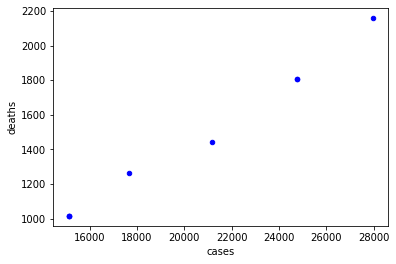

In [20]:
China_deaths.plot(kind="scatter",x="cases",y="deaths",color="blue")

In [21]:
?datetime

In [22]:
datetime.datetime.now()

datetime.datetime(2020, 3, 17, 10, 7, 15, 688480)

In [23]:
 #time.replace(hour=self.hour, minute=self.minute,
    #second=self.second, microsecond=self.microsecond, tzinfo=self.tzinfo, * fold=0)

In [24]:
import matplotlib.dates as dtm

In [25]:
import pandas as pd
file=pd.read_excel("coronaglobalstats.xlsx")

In [26]:
dfstats.describe(1:150)

SyntaxError: invalid syntax (<ipython-input-26-113477c23415>, line 1)

In [27]:
?pd.read_excel

In [48]:
#hvad jeg gerne vil gøre nu:
#bruge tiden til at lave en graf over udviklingen over tid
#-> skal finde ud af hvordan timestamp i pandas virker og datetime. i python